In [13]:
# Installs
# ! pip install supervision==0.3.0
# ! pip install -i https://test.pypi.org/simple/ supervision==0.3.0
# ! pip install -q transformers
# ! pip install -q pytorch-lightning
# ! pip install -q timm
# ! pip install scipy

# Torch GPU
# ! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# ! pip install torch

# Cython
# ! pip install Cython
# Pycocotools 
# ! pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

# PDF tools
# ! pip install PyMuPDF
# ! pip install fitz

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB 640.0 kB/s eta 0:00:05
   ---------------------------------------- 0.0/2.8 MB 435.7 kB/s eta 0:00:07
    --------------------------------------- 0.1/2.8 MB 544.7 kB/s eta 0:00:06
    --------------------------------------- 0.1/2.8 MB 544.7 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/2.8 MB 821.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/2.8 MB 1.1 MB/s eta 0:00:03
   ------- -------------------------------- 0.5/2.8 MB 1.7 MB/s eta 0:00:02
   ---------- ----------------------------- 0.7/2.8 MB 2.2 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 2.7 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.8 MB 3.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.8 MB 3.6 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/philferriere/cocoapi.git to c:\users\chirantan_degloorkar\appdata\local\temp\pip-install-l17l02uq\pycocotools_481f3c0d6ae447b9bb2c3fedd752aa91
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pycocotools: filename=pycocotools-2.0-cp312-cp312-win_amd64.whl size=81838 sha256=f85c6af7c3f776b6fe78a165245c05cad8389d9918f2053a1736679ee42dc019
  Stored in directory: C:\Users\Chirantan_Degloorkar\AppData\Local\Temp\pip-ephem-wheel-cache-hhvus0dr\wheels\1f\b0\8f\92f2873e69896ffee9742bf82e0a49310365a37b1d9209af69
Successfully built pycocotools


  Running command git clone --filter=blob:none --quiet https://github.com/philferriere/cocoapi.git 'C:\Users\Chirantan_Degloorkar\AppData\Local\Temp\pip-install-l17l02uq\pycocotools_481f3c0d6ae447b9bb2c3fedd752aa91'

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Imports 
import os
import supervision as sv

import torchvision
import torch
import pytorch_lightning

import transformers
from transformers import DetrForObjectDetection, DetrImageProcessor

import matplotlib.pyplot as plt

import cv2

import random
import numpy as np

from torch.utils.data import DataLoader
from PIL import Image


d:\Object Detection\object_detection\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Constants 
id2label = {
    4: 'north-sign', 
    2: 'color-stamp', 
    1: 'bar-scale', 
    3: 'detail-labels', 
    5: None, 
    6: None, 
    7: None, 
    8: None}

TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]

In [3]:
! nvcc --version

print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print(
    "; supervision:", sv.__version__,
    "; transformers:", transformers.__version__,
    "; pytorch_lightning:", pytorch_lightning.__version__
)

torch:  2.3 ; cuda:  cpu
; supervision: 0.3.0 ; transformers: 4.42.4 ; pytorch_lightning: 2.3.3


'nvcc' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# To run on GPU 
# DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# To load the pretrained model
# CHECKPOINT = 'facebook/detr-resnet-50'
CONFIDENCE_TRESHOLD = 0.5
IOU_TRESHOLD = 0.8

# for image_processor
CHECKPOINT = 'facebook/detr-resnet-50'

# To load the finetuned model 
MODEL_PATH = 'models/DETR-run2'

image_processor = DetrImageProcessor.from_pretrained(CHECKPOINT)
model = DetrForObjectDetection.from_pretrained(MODEL_PATH)

# For GPU 
# model.to(DEVICE)

### Sample Inferencing

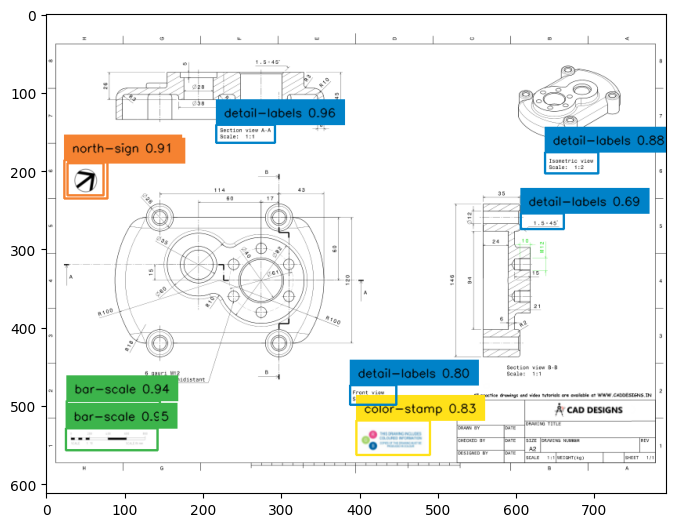

In [15]:
IMAGE_PATH = 'Temp/images/fd666743-outfile162.png'

# IMAGE_PATH = 'dog.jpeg'
with torch.no_grad():

    # load image and predict
    image = cv2.imread(IMAGE_PATH)
    inputs = image_processor(images=image, return_tensors='pt')
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]])
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results).with_nms(threshold=IOU_TRESHOLD)

labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]


box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(frame, (8, 8))

In [16]:
detections

Detections(xyxy=array([[217.99048 , 142.52269 , 292.38892 , 165.48073 ],
       [ 25.124916, 529.3095  , 142.08167 , 557.5258  ],
       [ 26.967525, 494.83783 , 145.64769 , 524.223   ],
       [ 27.571747, 191.374   ,  73.95733 , 232.69672 ],
       [ 23.408306, 187.14662 ,  78.971855, 236.50974 ],
       [637.1253  , 177.29585 , 705.3709  , 204.71236 ],
       [396.37634 , 519.87476 , 490.58295 , 563.7128  ],
       [388.14743 , 474.906   , 447.3775  , 499.53787 ],
       [606.6093  , 255.03123 , 661.59454 , 275.6331  ]], dtype=float32), class_id=array([3, 1, 1, 4, 4, 3, 2, 3, 3]), confidence=array([0.96142775, 0.95419663, 0.9383204 , 0.92409927, 0.9056257 ,
       0.87586045, 0.8259026 , 0.7994666 , 0.6870019 ], dtype=float32), tracker_id=None)

### TP, FP, TN Calculation

In [18]:
import torch
from torchvision.ops import box_iou

def calculate_tp_fp_fn(pred_boxes, pred_labels, true_boxes, true_labels, iou_threshold=0.5):
    # Initialize counters
    tp = 0
    fp = 0
    fn = 0

    if len(pred_boxes) == 0:
        return tp, len(true_boxes), len(true_boxes)  # All are FN if no predictions

    if len(true_boxes) == 0:
        return 0, len(pred_boxes), 0  # All are FP if no ground truths

    # Compute IoU between all predicted and ground truth boxes
    iou_matrix = box_iou(pred_boxes, true_boxes)
    
    # Create a set to keep track of matched ground truth boxes
    matched_true_boxes = set()
    
    for pred_idx in range(len(pred_boxes)):
        best_iou = -1
        best_gt_idx = -1
        for gt_idx in range(len(true_boxes)):
            if iou_matrix[pred_idx, gt_idx] > iou_threshold and pred_labels[pred_idx] == true_labels[gt_idx]:
                if iou_matrix[pred_idx, gt_idx] > best_iou:
                    best_iou = iou_matrix[pred_idx, gt_idx]
                    best_gt_idx = gt_idx
        
        if best_gt_idx >= 0:
            tp += 1
            matched_true_boxes.add(best_gt_idx)
        else:
            fp += 1

    fn = len(true_boxes) - len(matched_true_boxes)

    return tp, fp, fn

def calculate_map(pred_boxes, pred_labels, pred_scores, true_boxes, true_labels, iou_thresholds=[0.5]):
    aps = []
    for iou_threshold in iou_thresholds:
        tp, fp, fn = calculate_tp_fp_fn(pred_boxes, pred_labels, true_boxes, true_labels, iou_threshold)
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        ap = precision * recall
        aps.append(ap)
    return sum(aps) / len(aps) if aps else 0

# Example data
pred_boxes = torch.tensor([
    [217.99048 , 142.52269 , 292.38892 , 165.48073 ],
    [ 25.124916, 529.3095  , 142.08167 , 557.5258  ],
    [ 26.967525, 494.83783 , 145.64769 , 524.223   ],
    [ 27.571747, 191.374   ,  73.95733 , 232.69672 ],
    [ 23.408306, 187.14662 ,  78.971855, 236.50974 ],
    [637.1253  , 177.29585 , 705.3709  , 204.71236 ],
    [396.37634 , 519.87476 , 490.58295 , 563.7128  ],
    [388.14743 , 474.906   , 447.3775  , 499.53787 ],
    [606.6093  , 255.03123 , 661.59454 , 275.6331  ]
], dtype=torch.float32)

pred_labels = torch.tensor([3, 1, 1, 4, 4, 3, 2, 3, 3])
pred_scores = torch.tensor([0.96142775, 0.95419663, 0.9383204 , 0.92409927, 0.9056257 ,
                            0.87586045, 0.8259026 , 0.7994666 , 0.6870019 ], dtype=torch.float32)

true_boxes = torch.tensor([
    [ 29.14285714, 193.26315789,  76.69172932, 243.87969925],
    [392.66165414, 510.76691729, 493.89473684, 565.98496241],
    [ 29.14285714, 490.82706767, 147.2481203 , 521.5037594 ],
    [ 29.14285714, 529.17293233, 144.18045113, 559.84962406],
    [578.2556391 , 446.34586466, 665.68421053, 469.35338346],
    [631.93984962, 177.92481203, 710.16541353, 208.60150376],
    [378.85714286, 461.68421053, 440.21052632, 504.63157895],
    [211.66917293, 142.64661654, 306.76691729, 164.12030075]
], dtype=torch.float32)

true_labels = torch.tensor([4, 2, 1, 1, 3, 3, 3, 3])

# Calculate TP, FP, FN and mAP
tp, fp, fn = calculate_tp_fp_fn(pred_boxes, pred_labels, true_boxes, true_labels)
map_score = calculate_map(pred_boxes, pred_labels, pred_scores, true_boxes, true_labels, iou_thresholds=[0.5])

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"mAP: {map_score:.4f}")

True Positives (TP): 7
False Positives (FP): 2
False Negatives (FN): 2
mAP: 0.6049


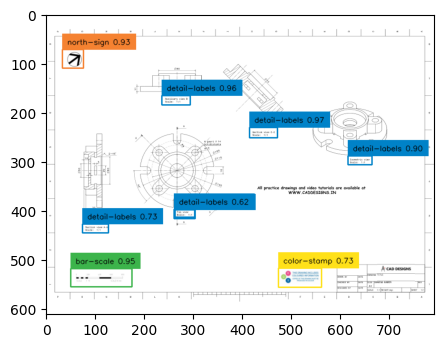

In [10]:
%matplotlib inline
sv.show_frame_in_notebook(frame, (5, 5))

In [5]:
# settings
ANNOTATION_FILE_NAME = r"result.json"
TRAIN_DIRECTORY = os.path.join(r"dataset", r"train")
VAL_DIRECTORY = os.path.join(r"dataset", r"val")
TEST_DIRECTORY = os.path.join(r"dataset", r"test")


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        annotation_file_path = os.path.join(image_directory_path, ANNOTATION_FILE_NAME)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target

In [6]:
TRAIN_DATASET = CocoDetection(
    image_directory_path=TRAIN_DIRECTORY+r'\images',
    image_processor=image_processor,
    train=True)
VAL_DATASET = CocoDetection(
    image_directory_path=VAL_DIRECTORY+r'\images',
    image_processor=image_processor,
    train=False)
TEST_DATASET = CocoDetection(
    image_directory_path=TEST_DIRECTORY+r'\images',
    image_processor=image_processor,
    train=False)

print("Number of training examples:", len(TRAIN_DATASET))
print("Number of validation examples:", len(VAL_DATASET))
print("Number of test examples:", len(TEST_DATASET))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Number of training examples: 145
Number of validation examples: 18
Number of test examples: 18


Image #15
dataset\test\images\fd666743-outfile162.png
{4: 'north-sign', 2: 'color-stamp', 1: 'bar-scale', 3: 'detail-labels'}


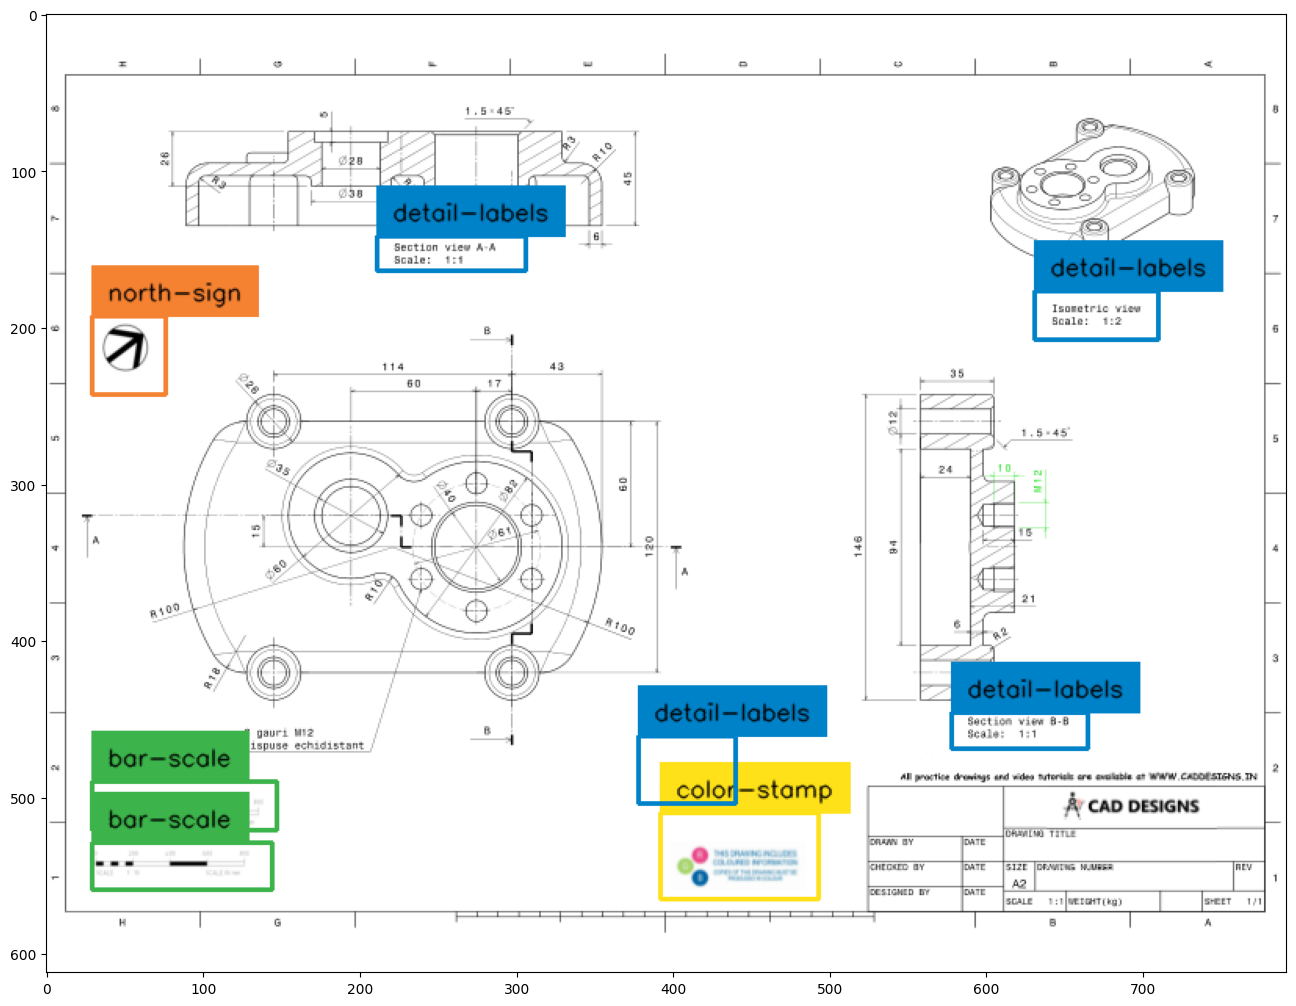

In [9]:
# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root,image['file_name'])
print(image_path)
image = cv2.imread(image_path)

# annotate
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

# we will use id2label function for training
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
print(id2label)
labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(image, (16, 16))

In [10]:
detections

Detections(xyxy=array([[ 29.14285714, 193.26315789,  76.69172932, 243.87969925],
       [392.66165414, 510.76691729, 493.89473684, 565.98496241],
       [ 29.14285714, 490.82706767, 147.2481203 , 521.5037594 ],
       [ 29.14285714, 529.17293233, 144.18045113, 559.84962406],
       [578.2556391 , 446.34586466, 665.68421053, 469.35338346],
       [631.93984962, 177.92481203, 710.16541353, 208.60150376],
       [378.85714286, 461.68421053, 440.21052632, 504.63157895],
       [211.66917293, 142.64661654, 306.76691729, 164.12030075]]), class_id=array([4, 2, 1, 1, 3, 3, 3, 3]), confidence=None, tracker_id=None)

In [67]:
detections

Detections(xyxy=array([[ 55.32554596, 104.48654139,  98.11477908, 145.92889792],
       [415.04520061, 499.01777552, 510.25901473, 546.67648553],
       [ 47.65871001, 518.91010665, 174.05789741, 554.1361097 ],
       [ 54.9111224 , 381.1142712 , 124.32706958, 403.90756729],
       [670.33011681, 241.24631793, 723.16912138, 257.82326054]]), class_id=array([4, 2, 1, 3, 3]), confidence=None, tracker_id=None)

In [11]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    # DETR authors employ various image sizes during training, making it not possible
    # to directly batch together images. Hence they pad the images to the biggest
    # resolution in a given batch, and create a corresponding binary pixel_mask
    # which indicates which pixels are real/which are padding
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

TRAIN_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=VAL_DATASET, collate_fn=collate_fn, batch_size=4)
TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=4)

In [23]:
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# # annotate
# detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
# labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
# frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# print('ground truth')
# %matplotlib inline
# sv.show_frame_in_notebook(frame, (16, 16))

# inference
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt')
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]])
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results)
labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

print('detections')
%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

NameError: name 'TEST_DATASET' is not defined

In [13]:
import fitz

pdffile = "test.pdf"
doc = fitz.open(pdffile)

page_count = doc.page_count
img_dir = 'Images/'
for i in range (page_count):
    page = doc.load_page(i)
    pix = page.get_pixmap()
    output = f"outfile{i+1}.png"
    pix.save(img_dir+output)


In [42]:
categories = TEST_DATASET.coco.cats
print(categories)

{4: {'id': 4, 'name': 'north-sign', 'supercategory': None}, 2: {'id': 2, 'name': 'color-stamp', 'supercategory': None}, 1: {'id': 1, 'name': 'bar-scale', 'supercategory': None}, 3: {'id': 3, 'name': 'detail-labels', 'supercategory': None}}


In [14]:
# id2label = {category['id']: category['name'] for category in categories.values()}
print(id2label)

{4: 'north-sign', 2: 'color-stamp', 1: 'bar-scale', 3: 'detail-labels', 5: None, 6: None, 7: None, 8: None}


In [47]:
img_folder = 'Images'
print(os.listdir(img_folder))

['outfile0.png', 'outfile1.png', 'outfile10.png', 'outfile11.png', 'outfile12.png', 'outfile13.png', 'outfile14.png', 'outfile15.png', 'outfile16.png', 'outfile17.png', 'outfile18.png', 'outfile2.png', 'outfile3.png', 'outfile4.png', 'outfile5.png', 'outfile6.png', 'outfile7.png', 'outfile8.png', 'outfile9.png']


In [57]:
# ! pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
def inference(image_list, image_folder, results_folder):
    for img in image_list:
        IMAGE_PATH = os.path.join(image_folder, img)
        print(IMAGE_PATH)
        with torch.no_grad():
            # load image and predict
            image = cv2.imread(IMAGE_PATH)
            inputs = image_processor(images=image, return_tensors='pt')
            outputs = model(**inputs)

            # post-process
            target_sizes = torch.tensor([image.shape[:2]])
            results = image_processor.post_process_object_detection(
                outputs=outputs,
                threshold=CONFIDENCE_TRESHOLD,
                target_sizes=target_sizes
            )[0]

        # annotate
        detections = sv.Detections.from_transformers(transformers_results=results).with_nms(threshold=IOU_TRESHOLD)

        labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]

        box_annotator = sv.BoxAnnotator()
        frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)
        Image.fromarray(frame).save(f"{results_folder}/annotated_{img}", format='PNG')
    

        # %matplotlib inline
        # sv.show_frame_in_notebook(frame, (8, 8))
        # # sv.save_frame(frame, f"Results/Predictions/annotated_{img}")
        # plt.savefig(frame, f"Results/Predictions/annotated_{img}")
        
img_folder = 'Images'
res_folder = 'Temp'
img_list = os.listdir(img_folder)

inference(img_list, image_folder=img_folder, results_folder=res_folder)


Images\outfile1.png
Images\outfile10.png
Images\outfile11.png
Images\outfile12.png
Images\outfile13.png
Images\outfile14.png
Images\outfile15.png
Images\outfile16.png
Images\outfile17.png
Images\outfile18.png
Images\outfile19.png
Images\outfile2.png
Images\outfile3.png
Images\outfile4.png
Images\outfile5.png
Images\outfile6.png
Images\outfile7.png
Images\outfile8.png
Images\outfile9.png


In [19]:
print(detections)

Detections(xyxy=array([[415.89014 , 231.9893  , 472.70258 , 252.05861 ],
       [236.53746 , 166.22589 , 294.12894 , 185.67789 ],
       [ 50.25598 , 519.4144  , 175.1004  , 556.466   ],
       [ 33.729103,  72.43819 ,  76.96428 , 110.91528 ],
       [616.1921  , 289.13388 , 665.6745  , 307.0343  ],
       [263.5347  , 399.7394  , 303.08142 , 414.39862 ],
       [ 74.957596, 428.81033 , 127.37326 , 446.45178 ],
       [474.46118 , 518.5411  , 562.2779  , 557.1082  ],
       [261.55103 , 398.2268  , 304.66693 , 417.0017  ]], dtype=float32), class_id=array([3, 3, 1, 4, 3, 3, 3, 2, 3]), confidence=array([0.9739924 , 0.96394724, 0.9491185 , 0.92668647, 0.8997368 ,
       0.8714977 , 0.73078084, 0.7306415 , 0.61604655], dtype=float32), tracker_id=None)


In [21]:
# image1 = Image.open(r'locationOfImage1\\Image1.png')

def savePDF(image_dir):
    imagelist = []
    for path in os.listdir(image_dir):
        im = Image.open(os.path.join(image_dir, path)).convert('RGB')
        imagelist.append(im)
    # im3 = image3.convert('RGB')
    im.save(r'CombinedPDF2.pdf',save_all=True, append_images=imagelist)

savePDF(image_dir=res_folder)
# imagelist = []

# image_dir = 'Results/Predictions'
# print(os.listdir(image_dir))
# count = 1
# for path in os.listdir(image_dir):
#     im = Image.open(os.path.join(image_dir, path)).convert('RGB')
#     imagelist.append(im)
# # im3 = image3.convert('RGB')

# im.save(r'CombinedPDF.pdf',save_all=True, append_images=imagelist)

In [24]:
# model.eval()

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

## TESTING

In [75]:
# ! pip install scikit-learn
! pip install seaborn tqdm 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import time
 
def convert_to_detections(outputs, threshold=0.4):
    probas = outputs.logits.softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > threshold
    bboxes_scaled = outputs.pred_boxes[0, keep].detach().cpu().numpy()
    probas = probas[keep].detach().cpu().numpy()
    return bboxes_scaled, probas
 
true_labels = []
pred_labels = []
 
test_time_start = time.time()
with torch.no_grad():
    for batch in tqdm(TEST_DATALOADER, desc="Testing"):
        pixel_values = batch['pixel_values']
        pixel_mask = batch.get('pixel_mask', None)
 
        labels = batch['labels']
 
        outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)
 
        bboxes, probas = convert_to_detections(outputs)
 
        # Get predicted labels
        batch_pred_labels = np.argmax(probas, axis=1)
        pred_labels.extend(batch_pred_labels)
 
        # Get true labels
        for ann in labels:
            if 'class_labels' in ann:
                true_labels.extend(ann['class_labels'].cpu().numpy())
            elif 'labels' in ann:
                true_labels.extend(ann['labels'].cpu().numpy())
            else:
                print("Warning: No label information found in annotation.")
                print("Annotation keys:", ann.keys())
 
test_time_end = time.time()
total_time = test_time_end - test_time_start
print(f"Time required for testing: {total_time:.2f} seconds")
 
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)
 
# Ensure true_labels and pred_labels have the same length
min_len = min(len(true_labels), len(pred_labels))
true_labels = true_labels[:min_len]
pred_labels = pred_labels[:min_len]
 
print("True labels:", true_labels)
print("Predicted labels:", pred_labels)
 
# Define id2label mapping
id2label = {
    1:'bar-scale',
    2:'color-stamp',
    3:'detail-labels',
    4:'north-sign'
    # Ensure this matches the actual classes
}
 
# Check if the number of unique classes matches the size of target_names
num_classes_true = len(set(true_labels))
num_classes_pred = len(set(pred_labels))
 
if num_classes_true != len(id2label) or num_classes_pred != len(id2label):
    raise ValueError(
        f"Number of classes in true_labels ({num_classes_true}) or pred_labels ({num_classes_pred}) does not match size of target_names ({len(id2label)})."
    )
 
# Calculate and print classification metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')
f1 = f1_score(true_labels, pred_labels, average='macro')
error_rate = 1 - accuracy
 
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\n")
 
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(id2label.values())))
 
# Create and plot confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
 

Testing:   0%|          | 0/5 [00:00<?, ?it/s]


TypeError: super(type, obj): obj must be an instance or subtype of type

In [80]:
TEST_DATALOADER

In [83]:
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
 
def convert_to_detections(outputs, threshold=0.4):
    probas = outputs.logits.softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > threshold
    bboxes_scaled = outputs.pred_boxes[0, keep].detach().cpu().numpy()
    probas = probas[keep].detach().cpu().numpy()
    return bboxes_scaled, probas
 
true_labels = []
pred_labels = []
 
test_time_start = time.time()
with torch.no_grad():
    for batch in tqdm(TEST_DATALOADER, desc="Testing"):
        pixel_values = batch['pixel_values']
        pixel_mask = batch.get('pixel_mask', None)
 
        labels = batch['labels']
 
        outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)
 
        bboxes, probas = convert_to_detections(outputs)
 
        # Get predicted labels
        batch_pred_labels = np.argmax(probas, axis=1)
        pred_labels.extend(batch_pred_labels)
 
        # Get true labels
        for ann in labels:
            if 'class_labels' in ann:
                true_labels.extend(ann['class_labels'].cpu().numpy())
            elif 'labels' in ann:
                true_labels.extend(ann['labels'].cpu().numpy())
            else:
                print("Warning: No label information found in annotation.")
                print("Annotation keys:", ann.keys())
 
test_time_end = time.time()
total_time = test_time_end - test_time_start
print(f"Time required for testing: {total_time:.2f} seconds")
 
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)
 
# Ensure true_labels and pred_labels have the same length
min_len = min(len(true_labels), len(pred_labels))
true_labels = true_labels[:min_len]
pred_labels = pred_labels[:min_len]
 
print("True labels:", true_labels)
print("Predicted labels:", pred_labels)
 
# Define id2label mapping
id2label = {
    0: 'Class0',
    1: 'Class1',
    2: 'Class2',
    3: 'Class3'
    # Ensure this matches the actual classes
}
 
# Check if the number of unique classes matches the size of target_names
num_classes_true = len(set(true_labels))
num_classes_pred = len(set(pred_labels))
 
if num_classes_true != len(id2label) or num_classes_pred != len(id2label):
    raise ValueError(
        f"Number of classes in true_labels ({num_classes_true}) or pred_labels ({num_classes_pred}) does not match size of target_names ({len(id2label)})."
    )
 
# Calculate and print classification metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')
f1 = f1_score(true_labels, pred_labels, average='macro')
error_rate = 1 - accuracy
 
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\n")
 
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(id2label.values())))
 
# Create and plot confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Testing:   0%|          | 0/5 [00:00<?, ?it/s]

TypeError: super(type, obj): obj must be an instance or subtype of type